# Problem Statement
BoomBikes-A US bike sharing provider has suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.As the company wants to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
#### - Which variables are significant in predicting the demand for shared bikes.
#### - How well those variables describe the bike demands.

# Business Goal
1.Develop a model to find variables with signigicant the demand for shared bikes with the available independent variables.

2.It will be used by the management to understand how exactly the demands vary with different features and accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.

3.Futher the model will be a good way for management to understand the demand dynamics of a new market. 

### Importing Libraries

In [1112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

## Step 1: Data understanding and EDA

### Loading Dataset

In [1113]:
#reading dataset using pandas

bikesharing_df= pd.read_csv('day.csv')
bikesharing_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


### Understanding Data

In [1114]:
bikesharing_df.shape  #number of rows and columns

(730, 16)

In [1115]:
#check for type of data and count of data in dataset
bikesharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1116]:
#describe statistical information
bikesharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Cleaning

#### Understand unique values

In [1117]:
bikesharing_df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

#### Handling Null values

In [1118]:
bikesharing_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [1119]:
bikesharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### Removing Undesirable Columns

In [1120]:
#dropping instant column as this column has no significance for our target
bikesharing_df.drop(['instant'],axis=1,inplace=True)
bikesharing_df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [1121]:
#dteday is not useful as it's a derived value from month and weekday 
bikesharing_df.drop(['dteday'],axis=1,inplace=True)
bikesharing_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [1122]:
#Removing casual and registered as target variable cnt describes cnt= casual + registered
bikesharing_df.drop(['casual'],axis=1,inplace=True)
bikesharing_df.drop(['registered'],axis=1,inplace=True)
bikesharing_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [1123]:
bikesharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [1124]:
# 'season', 'weathersit', 'workingday', and 'weekday' are columns
season_counts = bikesharing_df['season'].value_counts() if 'season' in bikesharing_df.columns else None
weathersit_counts = bikesharing_df['weathersit'].value_counts() if 'weathersit' in bikesharing_df.columns else None
workingday_counts = bikesharing_df['workingday'].value_counts() if 'workingday' in bikesharing_df.columns else None
weekday_counts = bikesharing_df['weekday'].value_counts() if 'weekday' in bikesharing_df.columns else None

# Combine all counts into one DataFrame
category_counts_df = pd.DataFrame({
    'Season': season_counts,
    'Weathersit': weathersit_counts,
    'Workingday': workingday_counts,
    'Weekday': weekday_counts
}).transpose()

# Display the DataFrame
print(category_counts_df)


                0      1      2      3      4      5      6
Season        NaN  180.0  184.0  188.0  178.0    NaN    NaN
Weathersit    NaN  463.0  246.0   21.0    NaN    NaN    NaN
Workingday  231.0  499.0    NaN    NaN    NaN    NaN    NaN
Weekday     105.0  105.0  104.0  103.0  104.0  104.0  105.0


### EDA

#### Outlier Treatment

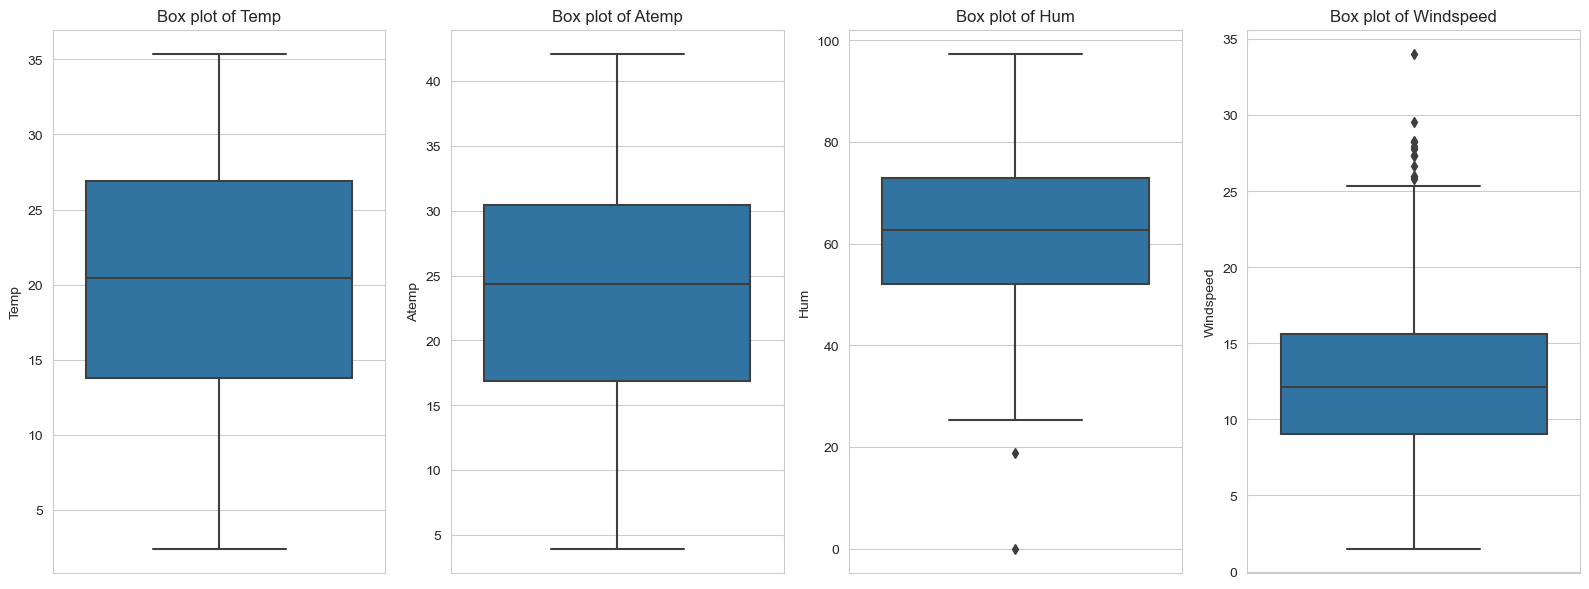

In [1125]:
#Draw boxplots for independent vars with ontinuous values to see outliers

def create_boxplots(df, cols):
    plt.figure(figsize=(16, 6)) 

    for i, col in enumerate(cols, 1):
        plt.subplot(1, len(cols), i)
        sns.boxplot(y=col, data=df)
        plt.title(f'Box plot of {col.capitalize()}')
        plt.ylabel(col.capitalize())
        plt.xlabel('')
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Define the columns to plot
cols = ['temp', 'atemp', 'hum', 'windspeed']

# Call the function to create boxplots
create_boxplots(bikesharing_df, cols)    

##### <span style="color:green"> **** No Outliers are present *** </span>

#### Handling categorical variables by replacing numerical codes with more descriptive labels 

In [1126]:

bikesharing_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikesharing_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bikesharing_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace= True)

bikesharing_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace= True)


In [1127]:
bikesharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualization

#### understand correlation and linear relationship

<Figure size 1800x1800 with 0 Axes>

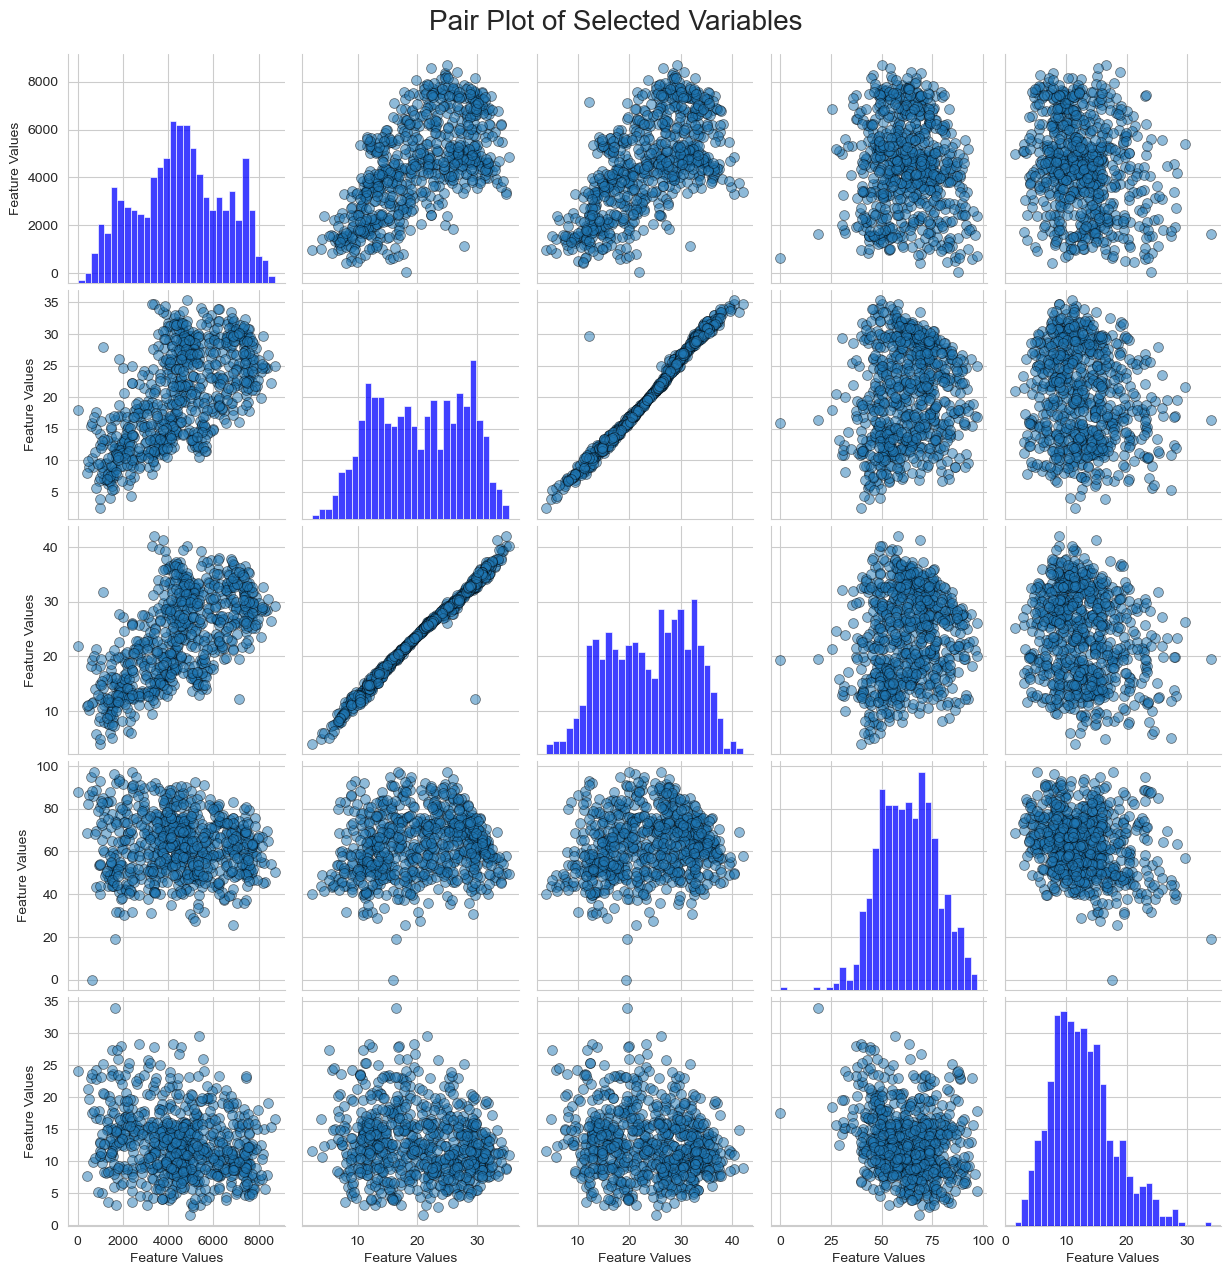

In [1128]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure and a set of subplots
plt.figure(figsize=(18, 18))

# Create a pair plot with enhanced aesthetics
pair_plot = sns.pairplot(data=bikesharing_df, vars=['cnt', 'temp', 'atemp', 'hum', 'windspeed'], 
                         plot_kws={'alpha':0.5, 's':50, 'edgecolor':'k'}, 
                         diag_kws={'color':'blue', 'bins':30})

# Customize titles and labels
pair_plot.fig.suptitle("Pair Plot of Selected Variables", y=1.02, fontsize=20)
pair_plot.set(xlabel='Feature Values', ylabel='Feature Values')

# Display the plot
plt.show()

##### <span style="color:green"> **** target variable cnt shares linear relationship with temp and atemp *** </span>

Correlation Matrix:
                 cnt      temp     atemp       hum  windspeed
cnt        1.000000  0.627044  0.630685 -0.098543  -0.235132
temp       0.627044  1.000000  0.991696  0.128565  -0.158186
atemp      0.630685  0.991696  1.000000  0.141512  -0.183876
hum       -0.098543  0.128565  0.141512  1.000000  -0.248506
windspeed -0.235132 -0.158186 -0.183876 -0.248506   1.000000


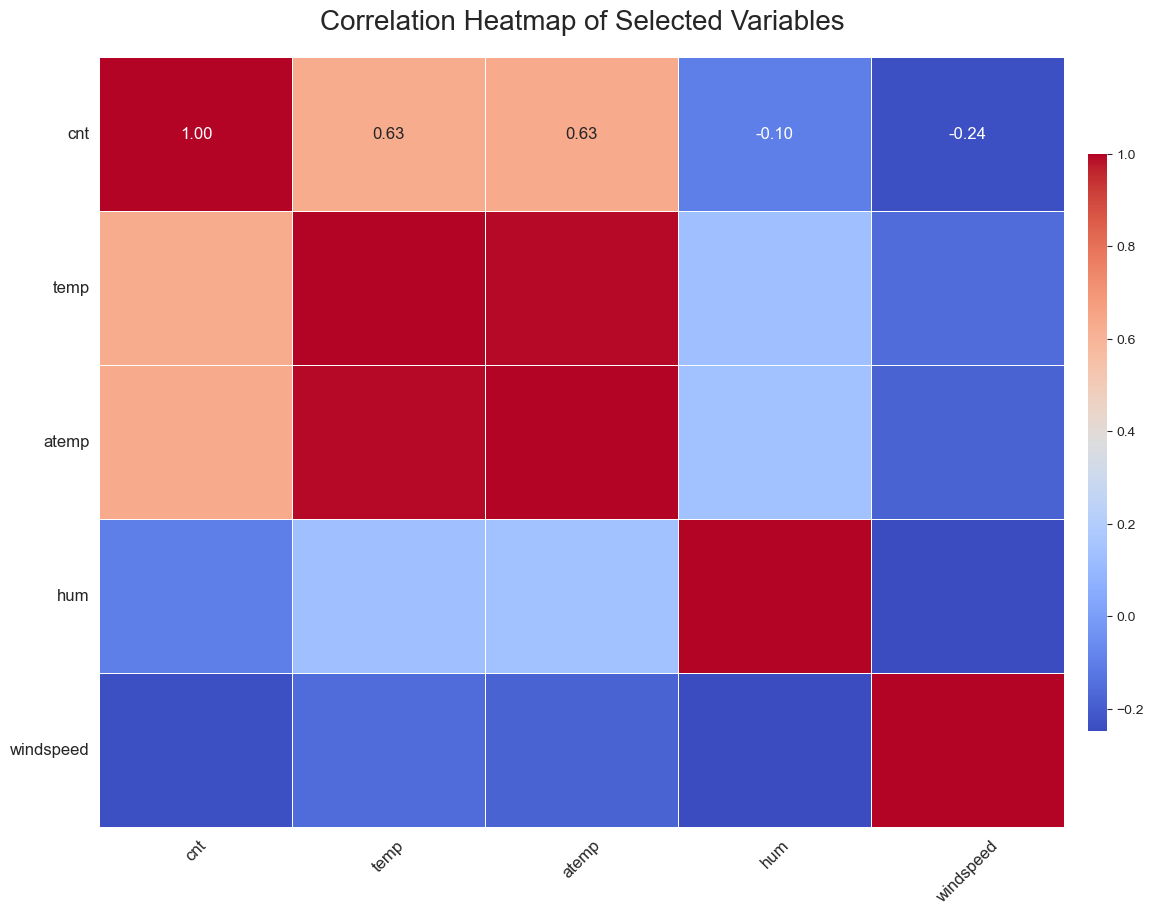

In [1129]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with a specified size
plt.figure(figsize=(15, 10))

# Calculate the correlation matrix for the selected columns
corr_matrix = bikesharing_df[['cnt', 'temp', 'atemp', 'hum', 'windspeed']].corr()

# Print the correlation matrix to verify its contents
print("Correlation Matrix:\n", corr_matrix)

# Create a heatmap with enhanced aesthetics
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f',
                      annot_kws={"size": 12}, cbar_kws={"shrink": 0.75, 'aspect': 30, 'pad': 0.02})

# Customize the title and axis labels
plt.title('Correlation Heatmap of Selected Variables', fontsize=20, pad=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)

# Display the plot
plt.show()

#### <span style="color:green"> Correlation Observation :
#### - <span style="color:green"> target variable cnt shares high correlation with temp and atemp
#### - <span style="color:green"> temp and atemp are highly correlated to each other.

<Figure size 2000x1500 with 0 Axes>

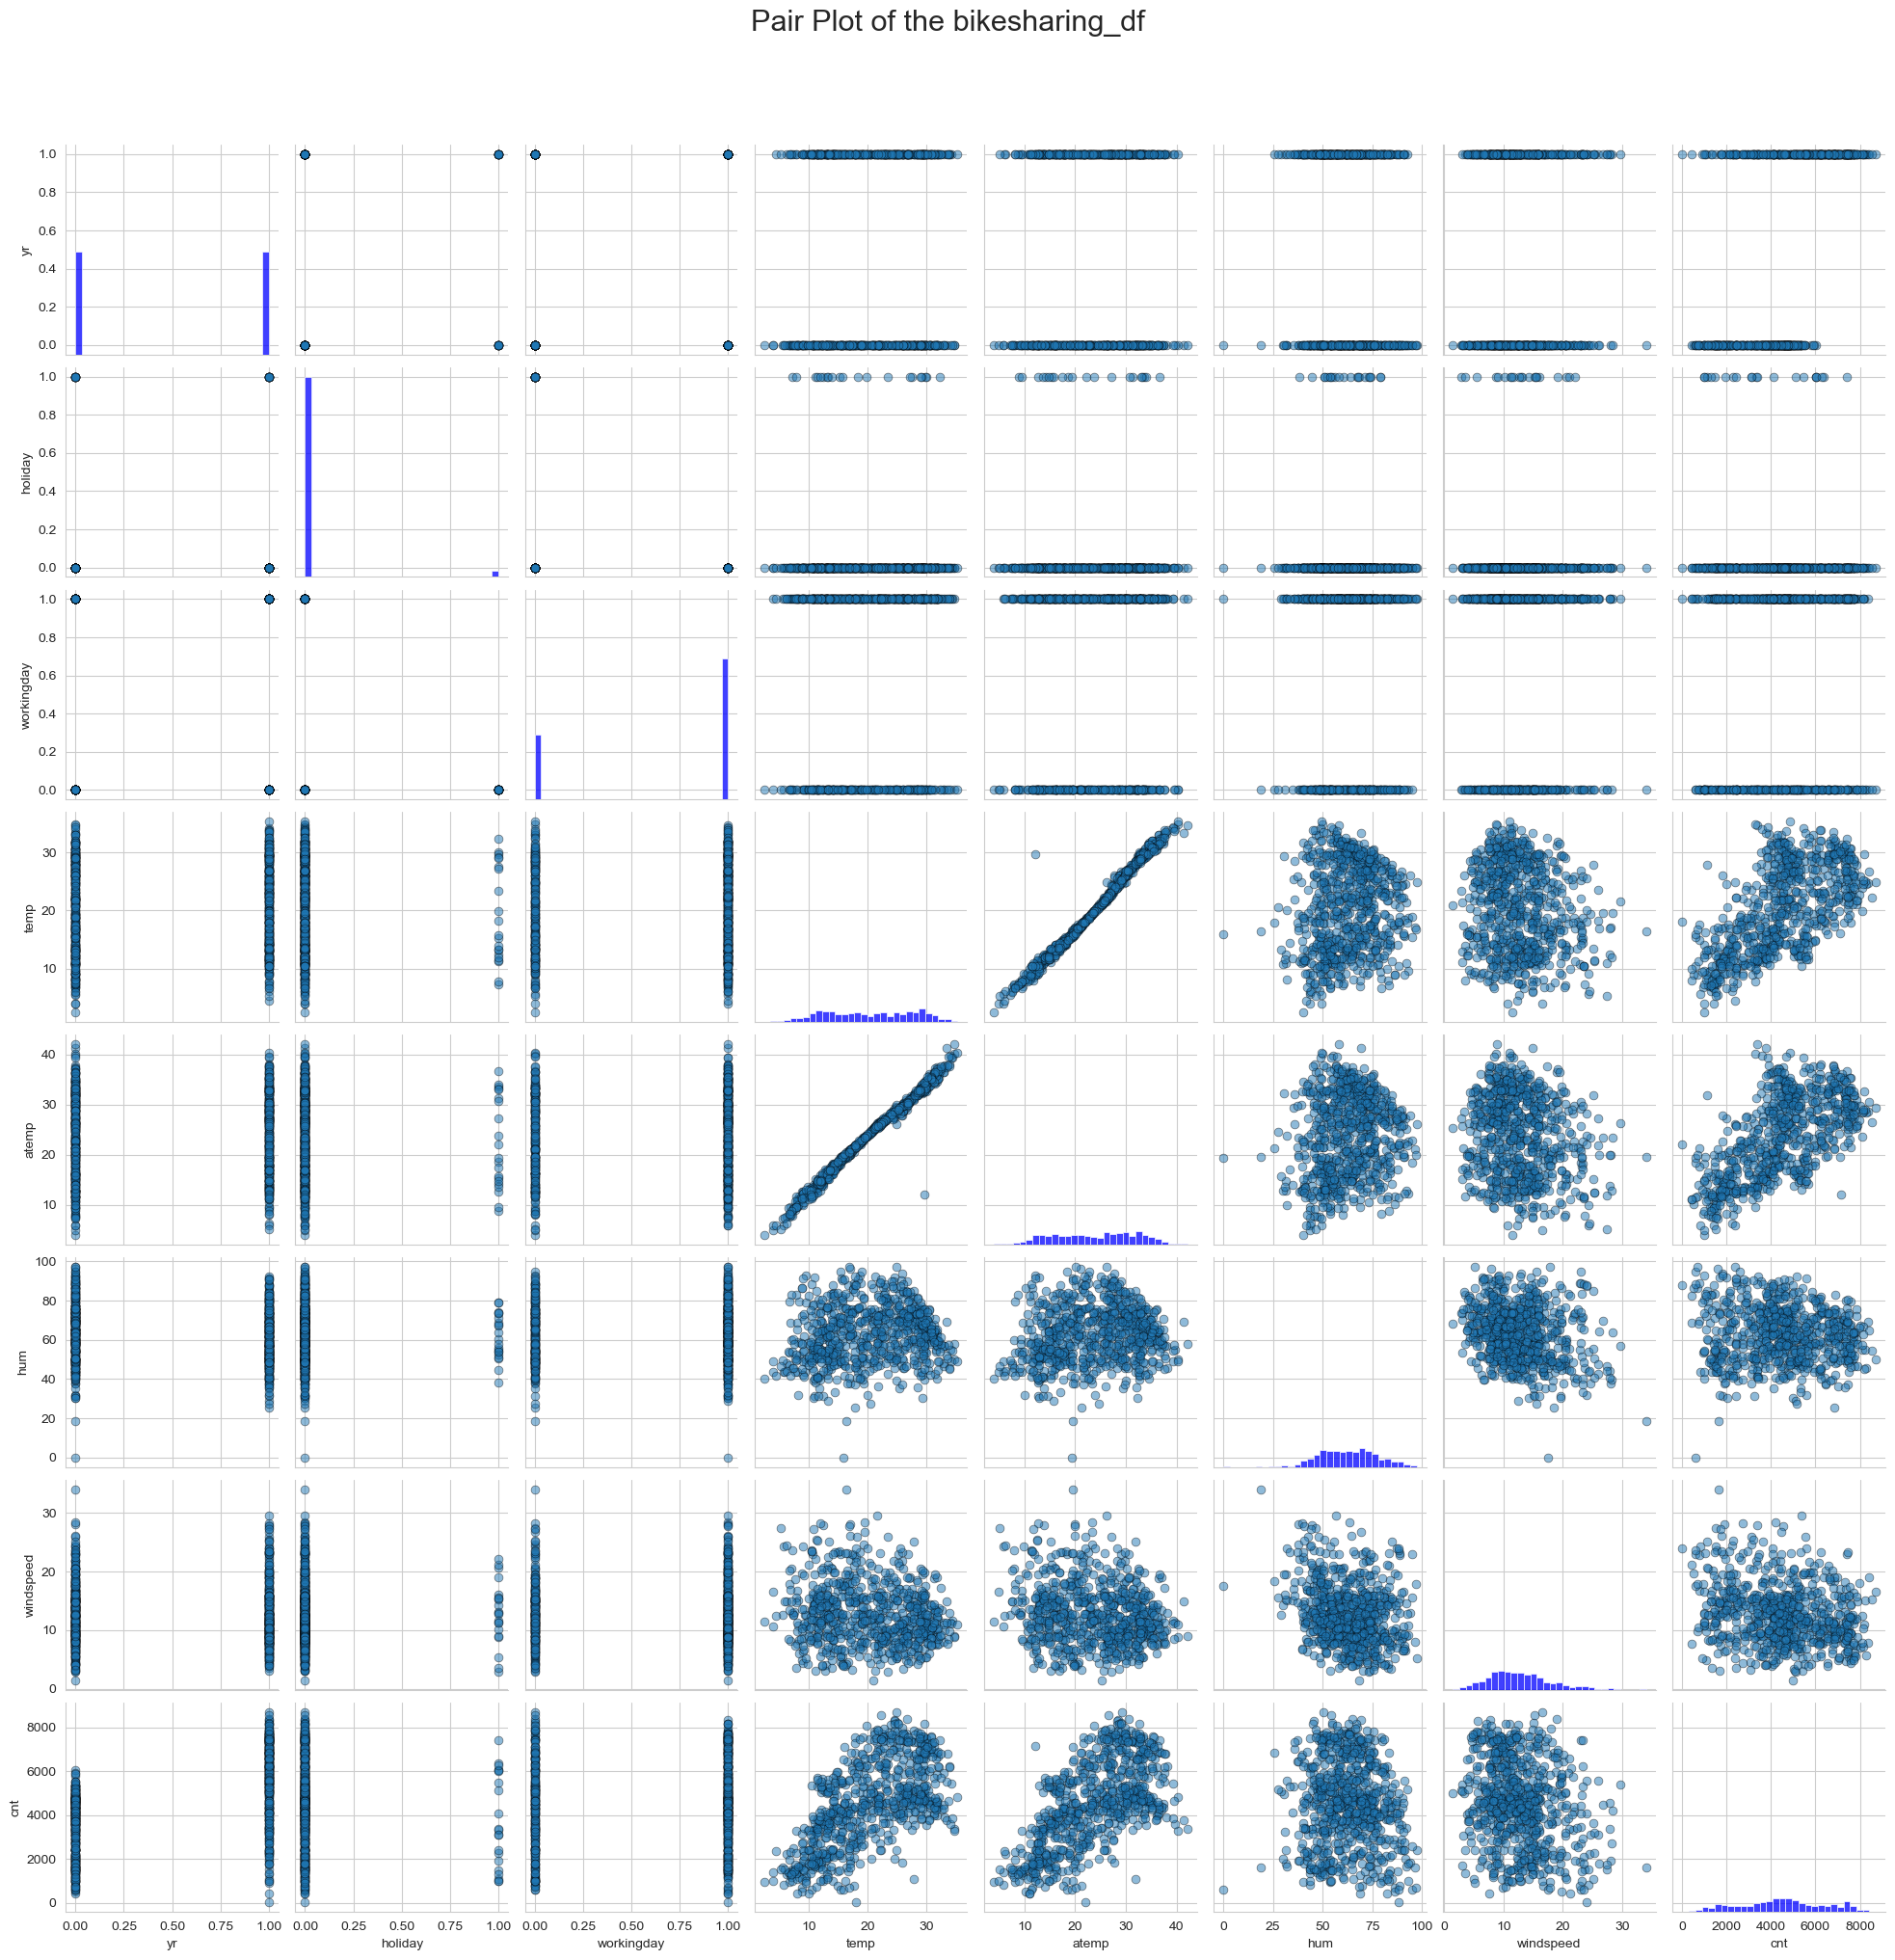

In [1130]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with a specified size
plt.figure(figsize=(20, 15))

# Create a pair plot with enhanced aesthetics
pair_plot = sns.pairplot(bikesharing_df,
                         plot_kws={'alpha':0.5, 's':40, 'edgecolor':'k'},
                         diag_kws={'color':'blue', 'bins':30})

# Customize the title and layout
pair_plot.fig.suptitle("Pair Plot of the bikesharing_df", y=1.02, fontsize=22)
plt.subplots_adjust(top=0.95)

# Display the plot
plt.show()

### Drop atemp variable to avoid multicollinearity with temp

In [1131]:
bikesharing_df.drop(['atemp'] , axis=1 , inplace=True )

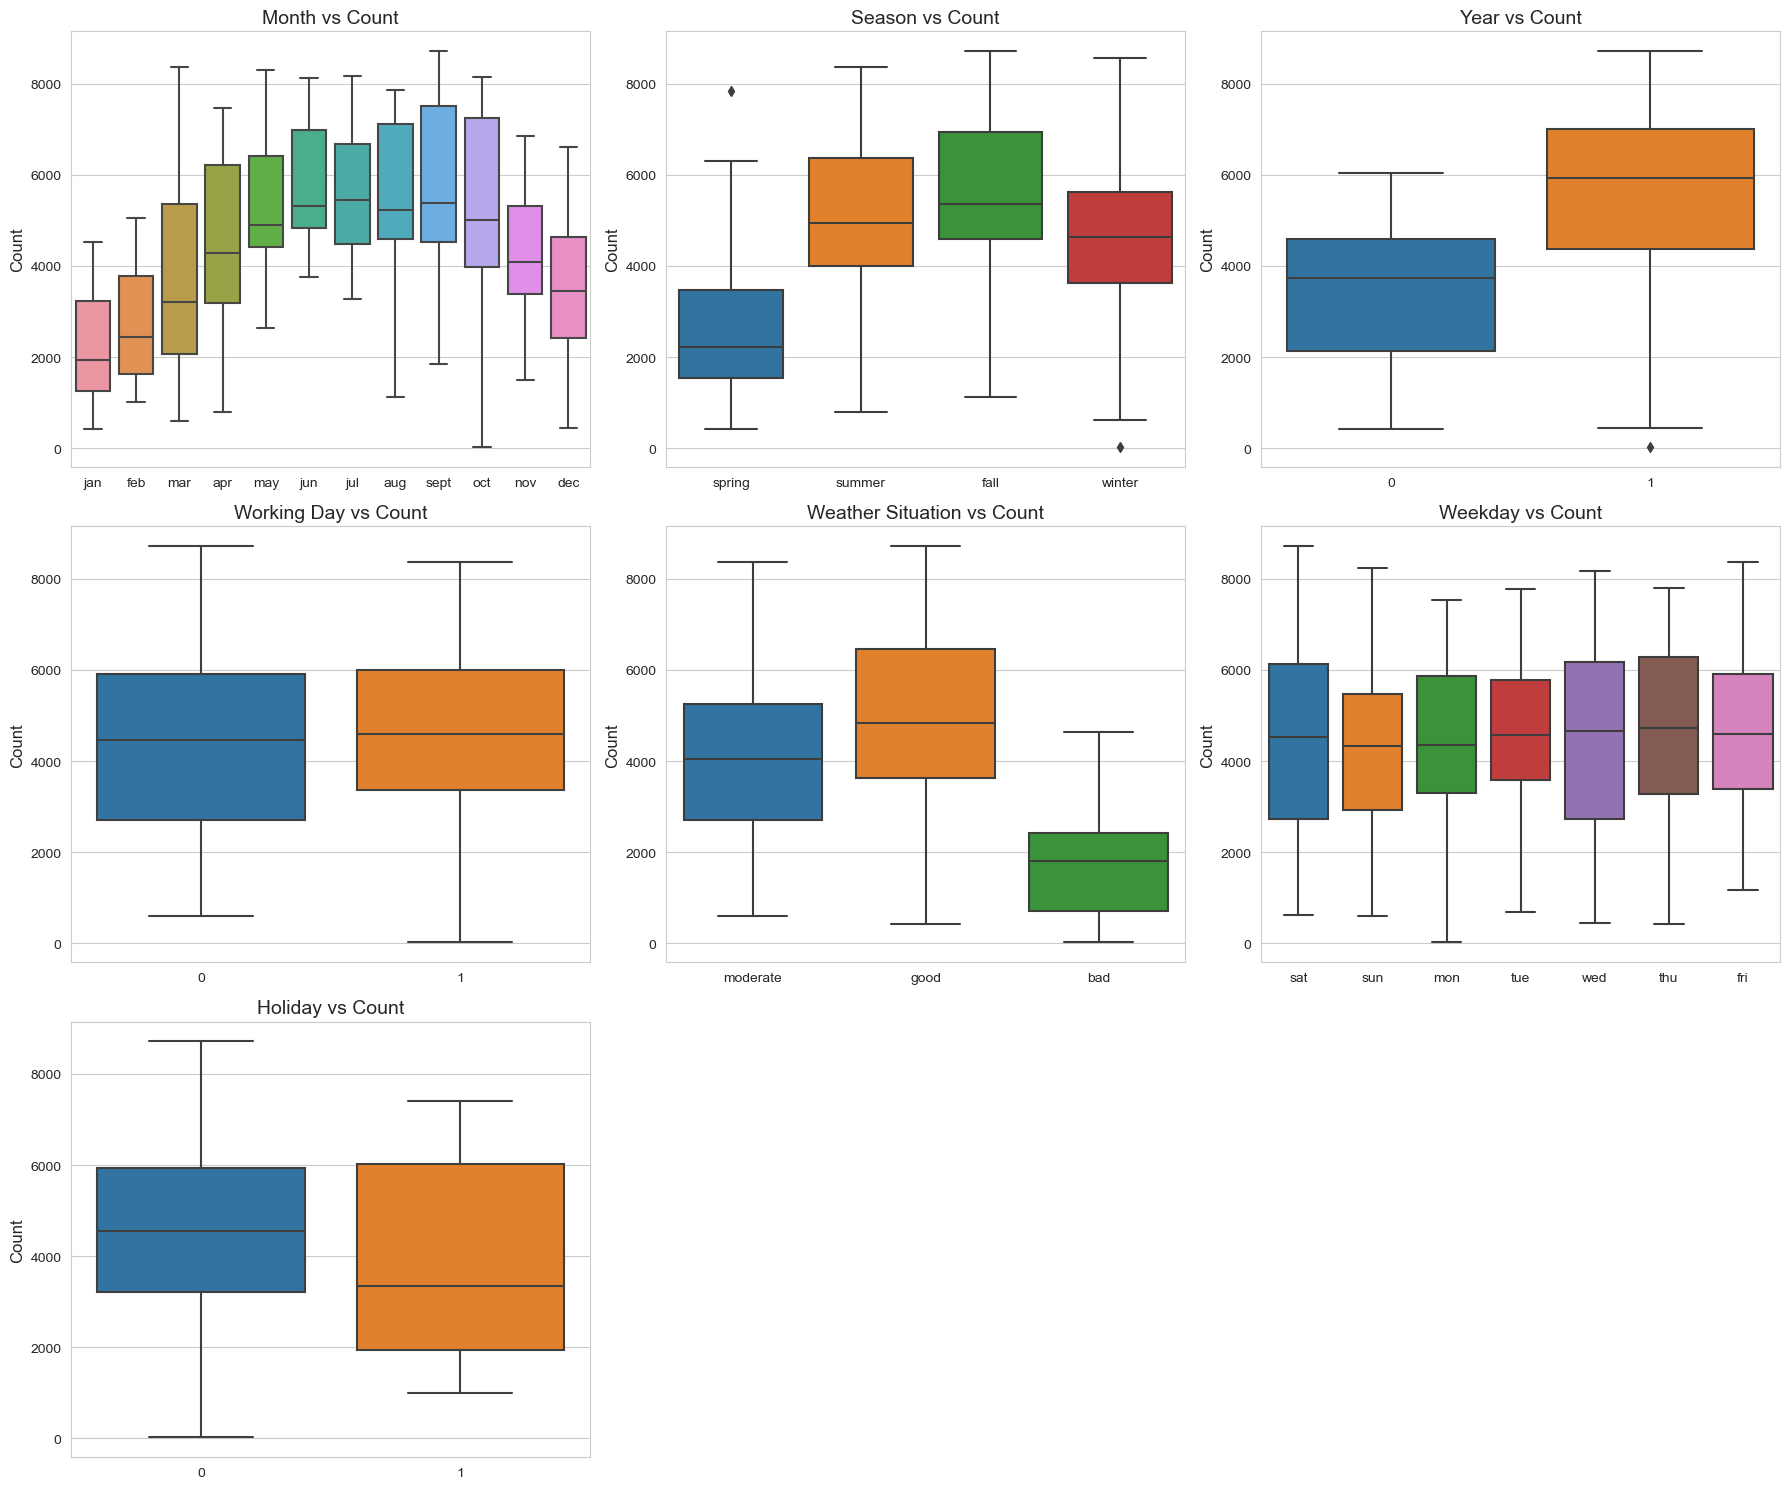

In [1132]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with a specified size
plt.figure(figsize=(18, 15))

# List of plot configurations
plot_configs = [
    ('mnth', 'Month vs Count', 1),
    ('season', 'Season vs Count', 2),
    ('yr', 'Year vs Count', 3),
    ('workingday', 'Working Day vs Count', 4),
    ('weathersit', 'Weather Situation vs Count', 5),
    ('weekday', 'Weekday vs Count', 6),
    ('holiday', 'Holiday vs Count', 7),
]

# Create subplots
for x, title, position in plot_configs:
    plt.subplot(3, 3, position)
    sns.boxplot(x=x, y='cnt', data=bikesharing_df)
    plt.title(title, fontsize=14)
    plt.xlabel('')
    plt.ylabel('Count', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

#### <span style="color:green"> Observations from the Plots:
#### - <span style="color:green">Bike sharing demand peaks in September and is lowest in January and December.
#### - <span style="color:green">The fall season has the highest bike sharing count, while spring has the lowest.
#### - <span style="color:green">The year 2019 saw more bike sharing than 2018, with higher demand on working days.
#### - <span style="color:green">Good weather conditions significantly increase bike sharing demand, whereas bad weather decreases it.
#### - <span style="color:green">Among weekdays, Saturday sees the highest bike sharing activity, while Sunday has the lowest, and holidays generally have reduced demand.
</span>

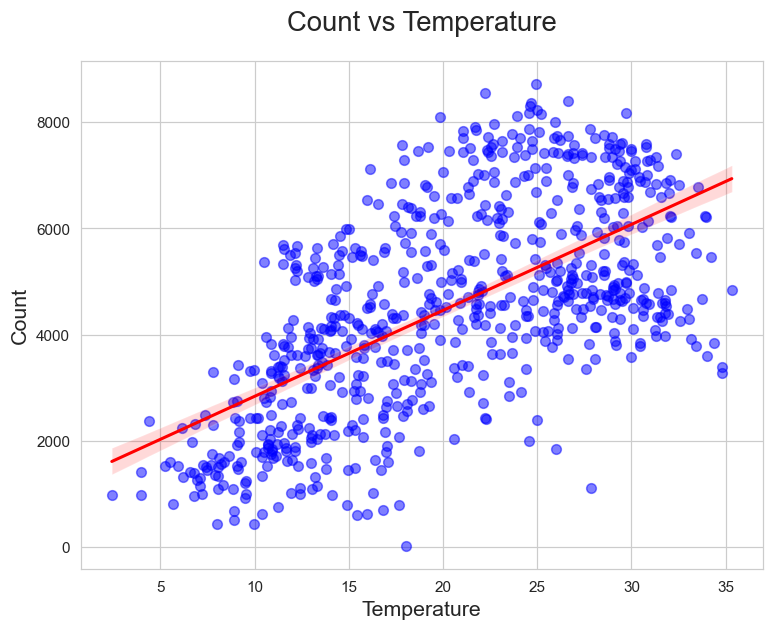

In [1133]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with a specified size and resolution
plt.figure(figsize=(8, 6), dpi=110)

# Add a title to the plot
plt.title("Count vs Temperature", fontsize=18, pad=20)

# Create a regression plot with enhanced aesthetics
sns.regplot(data=bikesharing_df, y="cnt", x="temp", scatter_kws={'s':40, 'alpha':0.5, 'color':'blue'}, line_kws={'color':'red', 'lw':2})

# Customize the x and y labels
plt.xlabel("Temperature", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Display the plot
plt.show()

## Step 3: Data Preparation for Linear Regression 

### Dummy variables Creation

In [1134]:
bikesharing_df = pd.get_dummies(data=bikesharing_df,columns=["season","mnth","weekday","weathersit"],drop_first=True)
bikesharing_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [1135]:
bikesharing_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,80.5833,10.749882,985,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
1,0,0,0,14.902598,69.6087,16.652113,801,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
2,0,0,1,8.050924,43.7273,16.636703,1349,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
3,0,0,1,8.200000,59.0435,10.739832,1562,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
4,0,0,1,9.305237,43.6957,12.522300,1600,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False


## Step 4: Splitting the Data Set into Training & Test

#### Divide data into train and test data 70:30

In [1136]:
bikesharing_df.shape

(730, 29)

In [1137]:
y=bikesharing_df.pop('cnt')   #y contains target variable

X=bikesharing_df             #X contains all other independent variables


In [1138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1139]:
X.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,80.5833,10.749882,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
1,0,0,0,14.902598,69.6087,16.652113,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
2,0,0,1,8.050924,43.7273,16.636703,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
3,0,0,1,8.200000,59.0435,10.739832,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
4,0,0,1,9.305237,43.6957,12.522300,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False


In [1140]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 28)
(219, 28)


In [1141]:
#Scaling: feature scaling is mandatory step for linear regression models in order to bring all features to same scale  
#before scaling checking the features of X_train

X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
683,1,0,1,13.188347,62.0417,10.250129,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True
645,1,1,0,15.716653,70.9583,12.708493,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True
163,0,0,1,26.035000,49.4583,20.458450,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False
360,0,0,1,13.325000,76.2500,12.626150,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
640,1,0,1,26.957500,79.3750,4.458569,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True


In [1142]:
X_train.describe()

,yr,holiday,workingday,temp,hum,windspeed
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,20.550310,63.482145,12.598001
std,0.500067,0.163398,0.470935,7.476797,13.939855,4.965253
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244
25%,0.000000,0.000000,0.000000,14.079626,52.848700,9.041918
50%,1.000000,0.000000,1.000000,21.354153,64.041700,11.791732
75%,1.000000,0.000000,1.000000,26.940424,73.458300,15.583497
max,1.000000,1.000000,1.000000,35.328347,97.041700,28.250014


### Rescaling the Features

In [1143]:
# scaling continuous variables temp,atemp,hum,windspeed

scaler_vars= ['temp','hum','windspeed']

scaler = MinMaxScaler()

#fit and transform X_train set

X_train[scaler_vars]= scaler.fit_transform(X_train[scaler_vars])

#Only transform X_test set
X_test[scaler_vars] = scaler.transform(X_test[scaler_vars])



In [1144]:
#let's check X_train set after scaling the variables
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.639330,0.327101,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True
645,1,1,0,0.403972,0.731215,0.419004,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True
163,0,0,1,0.717562,0.509660,0.708724,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False
360,0,0,1,0.331287,0.785745,0.415925,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
640,1,0,1,0.745598,0.817947,0.110593,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True


In [1145]:
X_train.describe()

,yr,holiday,workingday,temp,hum,windspeed
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.654174,0.414873
std,0.500067,0.163398,0.470935,0.227231,0.143648,0.185619
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.544598,0.281934
50%,1.000000,0.000000,1.000000,0.575304,0.659940,0.384732
75%,1.000000,0.000000,1.000000,0.745079,0.756977,0.526481
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1146]:
X_test.describe()

,yr,holiday,workingday,temp,hum,windspeed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.452055,0.031963,0.716895,0.527468,0.629546,0.435511
std,0.498836,0.176306,0.451539,0.229936,0.152584,0.212750
min,0.000000,0.000000,0.000000,0.047675,0.193646,0.060760
25%,0.000000,0.000000,0.000000,0.324018,0.520479,0.281156
50%,0.000000,0.000000,1.000000,0.507811,0.608416,0.416900
75%,1.000000,0.000000,1.000000,0.726388,0.735901,0.534288
max,1.000000,1.000000,1.000000,0.970925,1.002146,1.214955


In [1147]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
468,1,0,0,0.543115,0.518248,0.422104,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
148,0,0,0,0.758058,0.843709,0.479765,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False
302,0,0,0,0.324018,0.642765,0.386287,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
355,0,0,1,0.453814,0.780592,0.062325,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
515,1,0,1,0.773634,0.507943,0.433030,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False


## Step 5: Model Building

### Commmon Functions

In [1148]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to build model using statsmodels API
# Takes the columns to be selected for model as a parameter
def build_model(col):
    # Ensure that the columns specified exist in X_train
    if not all(c in X_train.columns for c in col):
        raise ValueError("Some columns specified do not exist in X_train")
    
    # Convert boolean columns to integers
    for c in col:
        if pd.api.types.is_bool_dtype(X_train[c]):
            X_train[c] = X_train[c].astype(int)
    
    # Add a constant to the model (intercept)
    X_train_sm = sm.add_constant(X_train[col])
    
    # Ensure y_train is numeric
    y_train_numeric = pd.to_numeric(y_train, errors='coerce')
    
    # Align y_train with X_train_sm to ensure they match
    common_indices = X_train_sm.index.intersection(y_train_numeric.index)
    X_train_sm = X_train_sm.loc[common_indices]
    y_train_numeric = y_train_numeric.loc[common_indices]
    
    # Build the OLS model
    lm = sm.OLS(y_train_numeric, X_train_sm).fit()
    
    # Retrieve the p-values and coefficients, excluding the intercept
    p_values = lm.pvalues.drop('const')
    coefficients = lm.params.drop('const')
    
    # Print the summary of the model
    print(lm.summary())
    
    return lm, p_values, coefficients

# Function to calculate and print Variance Inflation Factors (VIF)
# Takes a list of columns for which VIF is to be calculated as a parameter
def get_vif(col):
    df1 = X_train[col]  # Subset the DataFrame with specified columns
    vif = pd.DataFrame()  # Initialize an empty DataFrame to store VIF values
    vif['Features'] = df1.columns  # Add feature names to the DataFrame
    # Calculate VIF for each feature
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)  # Round VIF values to two decimal places
    # Print the VIF values sorted in descending order
    print(vif.sort_values(by='VIF', ascending=False))
    return vif

# Function to sort and categorize features based on p-values and VIFs
def build_model_vif_sort_features(col):
    lm, p_values, coefficients = build_model(col)
    vif_df = get_vif(col)
    
    # Ensure p-values, coefficients, and VIFs have the same length
    assert len(p_values) == len(coefficients) == len(vif_df), "Lengths of p-values, coefficients, and VIFs do not match"
    
    # Combine p-values, VIFs, and coefficients into a single DataFrame
    summary_df = pd.DataFrame({
        'Features': p_values.index,
        'P-Value': p_values.values,
        'VIF': vif_df['VIF'].values,
        'Coefficient': coefficients.values
    })
    
    # Categorize and sort features
    high_p_high_vif = summary_df[(summary_df['P-Value'] > 0.05) & (summary_df['VIF'] > 5)]
    high_p_low_vif = summary_df[(summary_df['P-Value'] > 0.05) & (summary_df['VIF'] <= 5)]
    low_p_high_vif = summary_df[(summary_df['P-Value'] <= 0.05) & (summary_df['VIF'] > 5)]
    low_p_low_vif = summary_df[(summary_df['P-Value'] <= 0.05) & (summary_df['VIF'] <= 5)]
    
    # Print sorted features
    print("\nHigh P-Value, High VIF:")
    print(high_p_high_vif.sort_values(by=['P-Value', 'VIF'], ascending=[False, False]))
    
    print("\nHigh P-Value, Low VIF:")
    print(high_p_low_vif.sort_values(by=['P-Value', 'VIF'], ascending=[False, True]))
    
    print("\nLow P-Value, High VIF:")
    print(low_p_high_vif.sort_values(by=['P-Value', 'VIF'], ascending=[True, False]))
    
    print("\nLow P-Value, Low VIF:")
    print(low_p_low_vif.sort_values(by=['P-Value', 'VIF'], ascending=[True, True]))

# Example usage
# col = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
#        'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
#        'weathersit_bad', 'weathersit_moderate']
# sort_features(col)

In [1149]:
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

### Model Building with Hybrid Approach - Using RFE(Automated) and Manual Elimination

#### selcting 15 features using RFE

In [1150]:
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [1151]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_aug', False, 6),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 8),
 ('mnth_jan', False, 14),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 10),
 ('mnth_mar', False, 3),
 ('mnth_may', False, 4),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 5),
 ('mnth_sept', False, 2),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 12),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

#### Features selected by RFE

In [1152]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov',
       'weekday_sat', 'weekday_sun', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

#### Features not selected by RFE

In [1153]:
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_aug', 'mnth_feb', 'mnth_jan', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

#### Final Train data after RFE and to proceed with Manual

In [1154]:
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov',
       'weekday_sat', 'weekday_sun', 'weathersit_good', 'weathersit_moderate']]
X_train_rfe.shape

(511, 15)

In [1155]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 683 to 102
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   511 non-null    int64  
 1   holiday              511 non-null    int64  
 2   workingday           511 non-null    int64  
 3   temp                 511 non-null    float64
 4   hum                  511 non-null    float64
 5   windspeed            511 non-null    float64
 6   season_spring        511 non-null    bool   
 7   season_summer        511 non-null    bool   
 8   season_winter        511 non-null    bool   
 9   mnth_aug             511 non-null    bool   
 10  mnth_dec             511 non-null    bool   
 11  mnth_feb             511 non-null    bool   
 12  mnth_jan             511 non-null    bool   
 13  mnth_jul             511 non-null    bool   
 14  mnth_jun             511 non-null    bool   
 15  mnth_mar             511 non-null    bool  

### Model 1 (with All Features from RFE)

In [1156]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov',
       'weekday_sat', 'weekday_sun', 'weathersit_good', 'weathersit_moderate']
np.asarray(cols)


array(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_jul',
       'mnth_nov', 'weekday_sat', 'weekday_sun', 'weathersit_good',
       'weathersit_moderate'], dtype='<U19')

In [1157]:
build_model_vif_sort_features(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.7
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.22e-185
Time:                        21:22:16   Log-Likelihood:                -4128.3
No. Observations:                 511   AIC:                             8287.
Df Residuals:                     496   BIC:                             8350.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 938.8080    

#### <span style="color:red">R-squared: 0.838. Some variables do not meet the condition of p-value < 0.05 and VIF < 5:
- `weekday_sun` has a high p-value, high VIF.
</span>

### Model 2 (dropping weekday_sun)

In [1158]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov',
       'weekday_sat', 'weathersit_good', 'weathersit_moderate']
np.asarray(cols)
build_model_vif_sort_features(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.7
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.22e-185
Time:                        21:22:30   Log-Likelihood:                -4128.3
No. Observations:                 511   AIC:                             8287.
Df Residuals:                     496   BIC:                             8350.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1086.6170    

#### <span style="color:red">R-squared: 0.838. Some variables do not meet the condition of p-value < 0.05 and VIF < 5:
- The variable `holiday` has a high p-value and high VIF.
</span>

### Model 3 (dropping holiday)

In [1159]:
cols = ['yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov',
       'weekday_sat', 'weathersit_good', 'weathersit_moderate']
np.asarray(cols)
build_model_vif_sort_features(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.97e-186
Time:                        21:22:30   Log-Likelihood:                -4129.5
No. Observations:                 511   AIC:                             8287.
Df Residuals:                     497   BIC:                             8346.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1036.8757    

#### <span style="color:red">R-squared: 0.837. Some variables do not meet the condition of VIF < 5:
- The variable `hum` has a high VIF.
</span>


### Model 4(dropping hum)

In [1160]:
cols = ['yr', 'workingday', 'temp', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov',
       'weekday_sat', 'weathersit_good', 'weathersit_moderate']

np.asarray(cols)
build_model_vif_sort_features(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     206.1
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.43e-184
Time:                        21:22:31   Log-Likelihood:                -4136.3
No. Observations:                 511   AIC:                             8299.
Df Residuals:                     498   BIC:                             8354.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -39.3550    

#### <span style="color:red">R-squared: 0.832. Some variables do not meet the condition of p-value < 0.05 and VIF < 5:
- The variable `weathersit_moderate` has a high VIF
</span>


### Model 4(dropping weathersit_moderate)

In [1161]:
cols = ['yr', 'workingday', 'temp', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov',
       'weekday_sat', 'weathersit_good']

np.asarray(cols)
build_model_vif_sort_features(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     200.5
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          3.72e-175
Time:                        21:22:31   Log-Likelihood:                -4160.9
No. Observations:                 511   AIC:                             8346.
Df Residuals:                     499   BIC:                             8397.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1435.1627    257.841     

#### <span style="color:red">R-squared: 0.815. Some variables do not meet the condition of p-value < 0.05 and VIF < 5:
- The variable `windspeed` has a high VIF
</span>


### Model 5 (dropping off windspeed)

In [1162]:
cols = ['yr', 'workingday', 'temp',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov',
       'weekday_sat', 'weathersit_good']

np.asarray(cols)
build_model_vif_sort_features(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     208.8
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.32e-171
Time:                        21:22:32   Log-Likelihood:                -4172.6
No. Observations:                 511   AIC:                             8367.
Df Residuals:                     500   BIC:                             8414.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             825.9022    230.150     

#### <span style="color:red">R-squared: 0.807. Some variables do not meet the condition of p-value < 0.05 and VIF < 5:
- The variable `workingday` has a high VIF
</span>


### Model 6 (dropping off Workingday)

In [1163]:
cols = ['yr', 'temp',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov',
       'weekday_sat', 'weathersit_good']

np.asarray(cols)
build_model_vif_sort_features(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     224.7
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.31e-169
Time:                        21:22:32   Log-Likelihood:                -4179.6
No. Observations:                 511   AIC:                             8379.
Df Residuals:                     501   BIC:                             8422.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1093.6613    221.331     

#### <span style="color:red">R-squared: 0.801. Some variables do not meet the condition of p-value < 0.05 and VIF < 5:
- The variable `weekday_sat` has a high P-Value
</span>


### Model 7 (dropping off weekday_sat)

In [1164]:
cols = ['yr', 'temp',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov', 'weathersit_good']

np.asarray(cols)
build_model_vif_sort_features(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     253.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          9.91e-171
Time:                        21:22:33   Log-Likelihood:                -4179.8
No. Observations:                 511   AIC:                             8378.
Df Residuals:                     502   BIC:                             8416.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1113.4500    219.146     

#### <span style="color:green">The above P-values are less than 0.05, VIF values are less than or equal to 5, and the R-squared value is quite good at 0.801. The small difference between R-squared and adjusted R-squared indicates that there are no additional parameters that need to be removed from the model.</span>


In [1165]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [1166]:
#Build the final model using sklearn using final model var 

cols = ['yr', 'temp',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov', 'weathersit_good']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1113.4500281775736 [ 2045.67096734  3875.87030846 -1232.78384262   770.12656816
  -617.6478636   -595.77195537  -700.44384874   795.22549989]


## Step 6: Model Evaluation

### Residual analysis


In [1167]:
y_train_pred = lr.predict(X_train[cols])

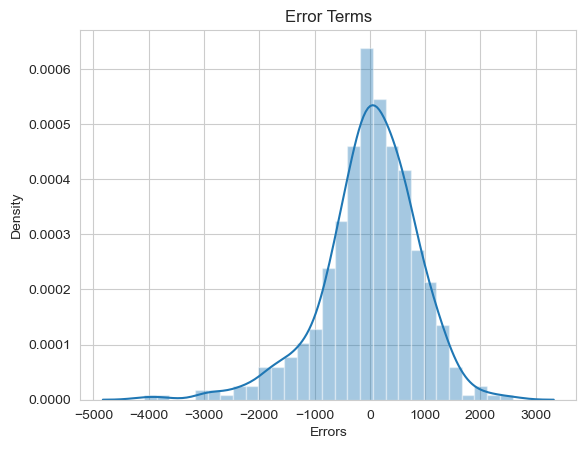

In [1168]:
#Plot a histogram of the error terms
#function defination
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

    
#plotting
plot_res_dist(y_train, y_train_pred)

#### <span style="color:green">Errors are normally distributed with a mean of 0.</span>

### R squared value for trained prediction

In [1169]:
r2_score(y_train,y_train_pred)

0.8012917065710854

#### <span style="color:green">The R-squared value for the train predictions is approximately equal to the R-squared value from the final model.</span>

#### scatter plot for the check for linearity


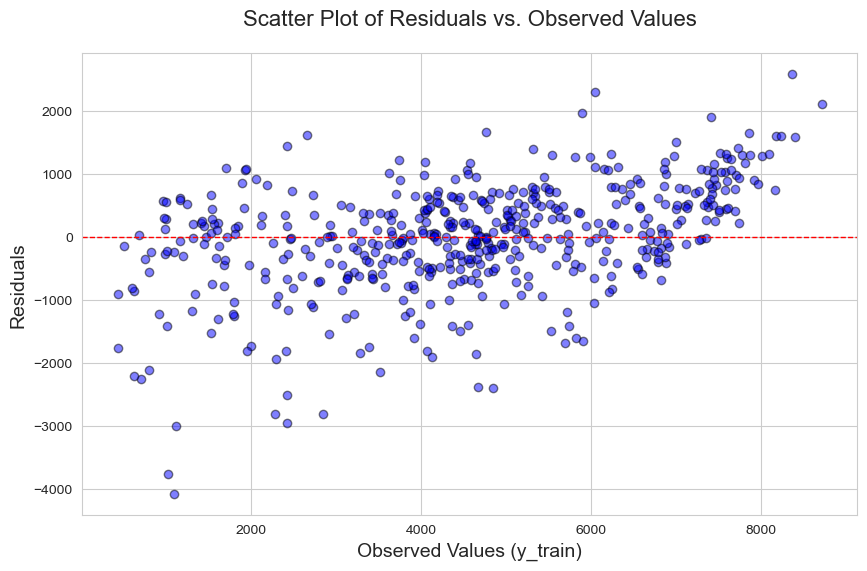

In [1170]:
# Calculate residuals
residuals = y_train - y_train_pred

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_train, residuals, alpha=0.5, edgecolor='k', facecolor='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=1)

# Add labels and title
plt.title('Scatter Plot of Residuals vs. Observed Values', fontsize=16, pad=20)
plt.xlabel('Observed Values (y_train)', fontsize=14)
plt.ylabel('Residuals', fontsize=14)

# Display the plot
plt.show()


### Predict values for test data

In [1171]:
y_test_pred = lr.predict(X_test[cols])
r2_score(y_test,y_test_pred)

0.7747818092315688

#### Error term distribution for test data

#### <span style="color:green">Conclusions:
- Homoscedasticity is observed.
- The R-squared value for the training dataset is 0.80 and for the test dataset is 0.78.
- This indicates that the model is performing well in predicting the test data.</span>


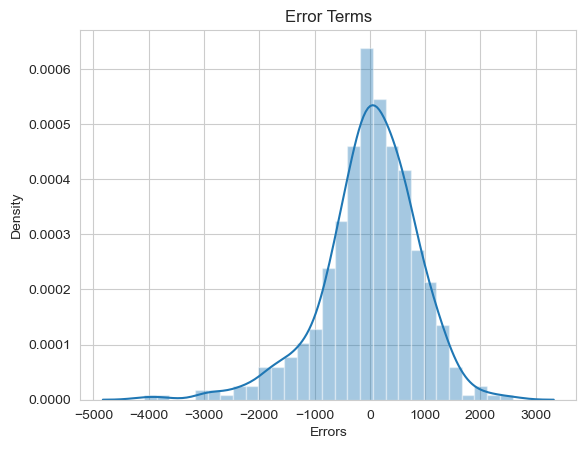

In [1172]:
plot_res_dist(y_train, y_train_pred)

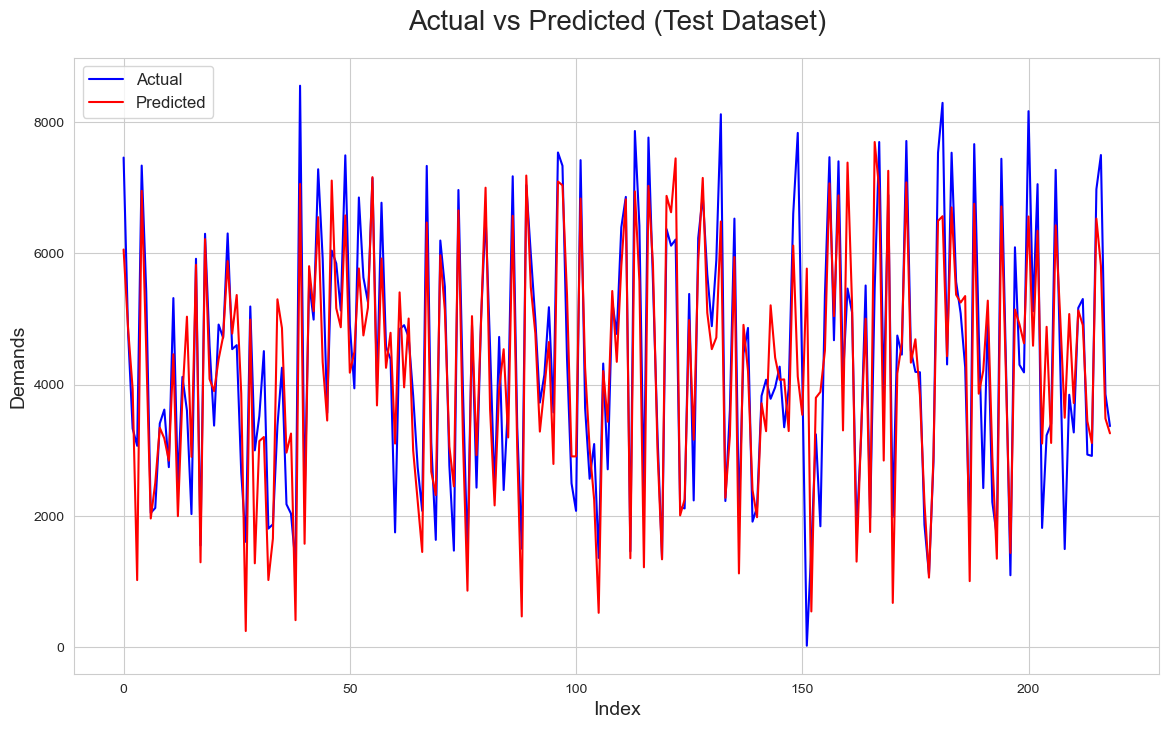

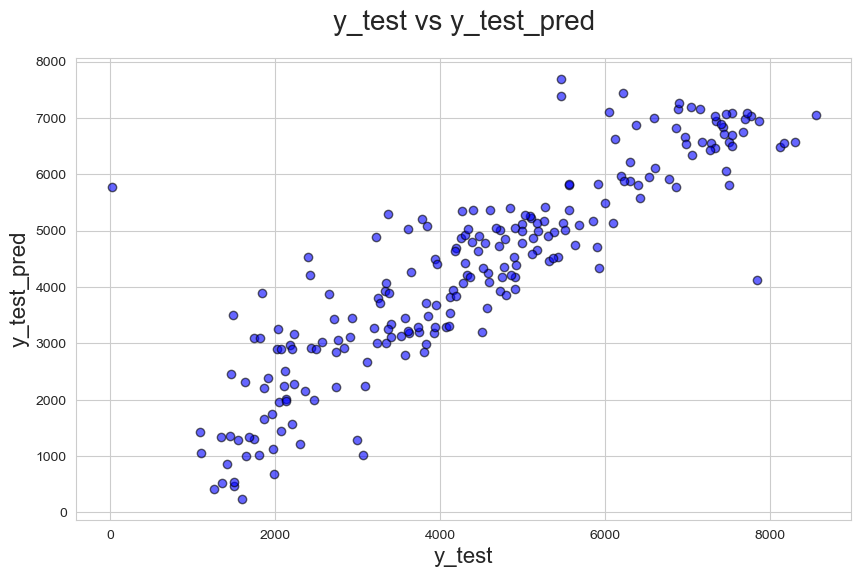

In [1173]:
# Create a range for the x-axis
c = [i for i in range(0, len(X_test), 1)]

# Plot actual values
plt.figure(figsize=(14, 8))
plt.plot(c, y_test, color="blue", label='Actual')

# Plot predicted values
plt.plot(c, y_test_pred, color="red", label='Predicted')

# Add title and labels
plt.title('Actual vs Predicted (Test Dataset)', fontsize=20, pad=20)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Demands', fontsize=14)

# Add legend
plt.legend(loc='best', fontsize=12)

# Display the plot
plt.show()


# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Create scatter plot
plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolor='k', color='blue')

# Add title and labels
plt.title('y_test vs y_test_pred', fontsize=20, pad=20)
plt.xlabel('y_test', fontsize=16)
plt.ylabel('y_test_pred', fontsize=16)

# Display the plot
plt.grid(True)
plt.show()


#### <span style="color:green">Inference from the graph:
- The error terms for the test data follow a normal distribution with a mean of 0, similar to the training dataset.
- The pattern of the actual data and predicted test data is consistent with the training dataset.
- The linearity between y_test and y_test_predicted indicates that the model performs well.</span>